### Look at the big picture

The goal of this task is to predict patient's length-of-stay in the hospital.

### Get data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [17]:
train = pd.read_csv('training_data.csv')
test = pd.read_csv('test_data.csv')
metadata = pd.read_csv('metadata.csv')
data_dictionary = pd.read_csv('data_dictionary.csv')
print(train.shape)
print(test.shape)

(70000, 27)
(30000, 26)
deez


## Explore the data to gain insights

#### Training set

In [3]:
train.head()

,id,vdate,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,...,sodium,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,facid,lengthofstay
0,76513,2012-07-05,4,M,False,False,False,False,False,True,...,137.150067,148.420532,23.0,0.955051,28.450268,63,6.7,1,E,7
1,60406,2012-02-26,1,M,False,False,False,False,False,False,...,140.643655,166.718526,9.0,1.385747,29.233048,81,6.5,0,B,3
2,27322,2012-11-19,1,F,False,False,False,False,False,False,...,138.459305,106.468142,12.0,0.816984,34.295535,75,6.5,1,B,5
3,53699,2012-01-30,0,F,False,False,False,False,False,False,...,138.667613,144.311236,12.0,1.082725,31.207914,75,6.5,1,B,2
4,65412,2012-09-04,3,F,False,True,False,False,False,False,...,133.463292,199.728635,12.0,1.081557,30.475797,89,6.5,7,D,8


We note that there are some missing values in the feature `gender`, `hemo` and `bmi`. info()

In [4]:
train.isna().any()

id                            False
vdate                         False
rcount                        False
gender                         True
dialysisrenalendstage         False
asthma                        False
irondef                       False
pneum                         False
substancedependence           False
psychologicaldisordermajor    False
depress                       False
psychother                    False
fibrosisandother              False
malnutrition                  False
hemo                           True
hematocrit                    False
neutrophils                   False
sodium                        False
glucose                       False
bloodureanitro                False
creatinine                    False
bmi                            True
pulse                         False
respiration                   False
secondarydiagnosisnonicd9     False
facid                         False
lengthofstay                  False
dtype: bool

In [5]:
train.hemo.unique()

array([False, True, nan], dtype=object)

In [6]:
train.gender.unique()

array(['M', 'F', nan], dtype=object)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          70000 non-null  int64  
 1   vdate                       70000 non-null  object 
 2   rcount                      70000 non-null  int64  
 3   gender                      69931 non-null  object 
 4   dialysisrenalendstage       70000 non-null  bool   
 5   asthma                      70000 non-null  bool   
 6   irondef                     70000 non-null  bool   
 7   pneum                       70000 non-null  bool   
 8   substancedependence         70000 non-null  bool   
 9   psychologicaldisordermajor  70000 non-null  bool   
 10  depress                     70000 non-null  bool   
 11  psychother                  70000 non-null  bool   
 12  fibrosisandother            70000 non-null  bool   
 13  malnutrition                700

Replace NaN values by mean

In [8]:
HemoMedian = train["hemo"].median()
train["hemo"].fillna(HemoMedian, inplace=True)


In [9]:
BMIMedian = train["bmi"].median()
train["bmi"].fillna(BMIMedian, inplace=True)

Replace NaN with dummies for `gender`. (Binary representation)

In [10]:
train = pd.concat([train.drop('gender', axis=1), pd.get_dummies(train['gender'])], axis=1)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          70000 non-null  int64  
 1   vdate                       70000 non-null  object 
 2   rcount                      70000 non-null  int64  
 3   dialysisrenalendstage       70000 non-null  bool   
 4   asthma                      70000 non-null  bool   
 5   irondef                     70000 non-null  bool   
 6   pneum                       70000 non-null  bool   
 7   substancedependence         70000 non-null  bool   
 8   psychologicaldisordermajor  70000 non-null  bool   
 9   depress                     70000 non-null  bool   
 10  psychother                  70000 non-null  bool   
 11  fibrosisandother            70000 non-null  bool   
 12  malnutrition                70000 non-null  bool   
 13  hemo                        700

our target label is ``lengthofstay`.  It is a continuous value and our task is a *regression task*. 

<AxesSubplot: >

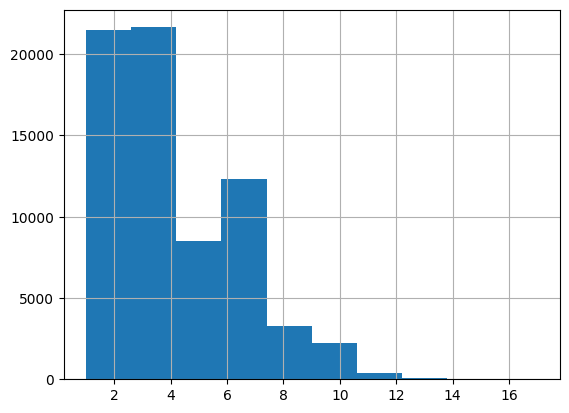

In [12]:
train.lengthofstay.hist()

#### Data dictionary

In [13]:
data_dictionary.head()

,Index,Data fields,Type,Descriptions,LengthOfStay
0,1.0,eid,Integer,Unique Id of the hospital admission,NaN
1,2.0,vdate,String,Visit date,NaN
2,3.0,rcount,Integer,Number of readmissions within last 180 days,NaN
3,4.0,gender,String,Gender of the patient\nM or F,NaN
4,5.0,dialysisrenalendstage,String,Flag for renal disease during encounter,NaN


#### Metadata

In [14]:
metadata.head()

,Capacity,Id,Name
0,30,C,General Medicine 3 South
1,95,E,Behavioral 1 East
2,75,A,General Medicine 3 West
3,80,B,Pulmonary 2 West
4,100,D,Geriatrics 2 East


#### Test set

In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          30000 non-null  int64  
 1   vdate                       30000 non-null  object 
 2   rcount                      30000 non-null  int64  
 3   gender                      29969 non-null  object 
 4   dialysisrenalendstage       30000 non-null  bool   
 5   asthma                      30000 non-null  bool   
 6   irondef                     30000 non-null  bool   
 7   pneum                       30000 non-null  bool   
 8   substancedependence         30000 non-null  bool   
 9   psychologicaldisordermajor  30000 non-null  bool   
 10  depress                     30000 non-null  bool   
 11  psychother                  30000 non-null  bool   
 12  fibrosisandother            30000 non-null  bool   
 13  malnutrition                300

### Notatet